<a href="https://colab.research.google.com/github/rahul713rk/Computer_Vision/blob/main/image_classification_on_pneumonia_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. The source training set is split with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are center-cropped with a window size of length of the short edge and resized into 1 × 28 × 28.

Dataset Link ▶ **[pneumonia_mnist](https://www.tensorflow.org/datasets/catalog/pneumonia_mnist)**

In [1]:
# !pip install tfds-nightly

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds


In [34]:
dataset , info = tfds.load('pneumonia_mnist' , with_info= True , as_supervised=True)

In [35]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'val': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [36]:
train = dataset['train']
val = dataset['val']
test = dataset['test']

In [37]:
len(train) , len(val) , len(test)

(4708, 524, 624)

In [38]:
def dataset_split(dataset):
  unbatched_dataset = dataset
  images = []
  labels = []
  for x, y in unbatched_dataset:
    images.append(x.numpy())
    labels.append(y.numpy())

  X_train = np.array(images)
  y_train = np.array(labels)

  print(f"Shape of X : {X_train.shape}")
  print(f"Shape of y : {y_train.shape}")

  return X_train , y_train

In [39]:
num_classes = 1
input_shape = (28 , 28 , 1)

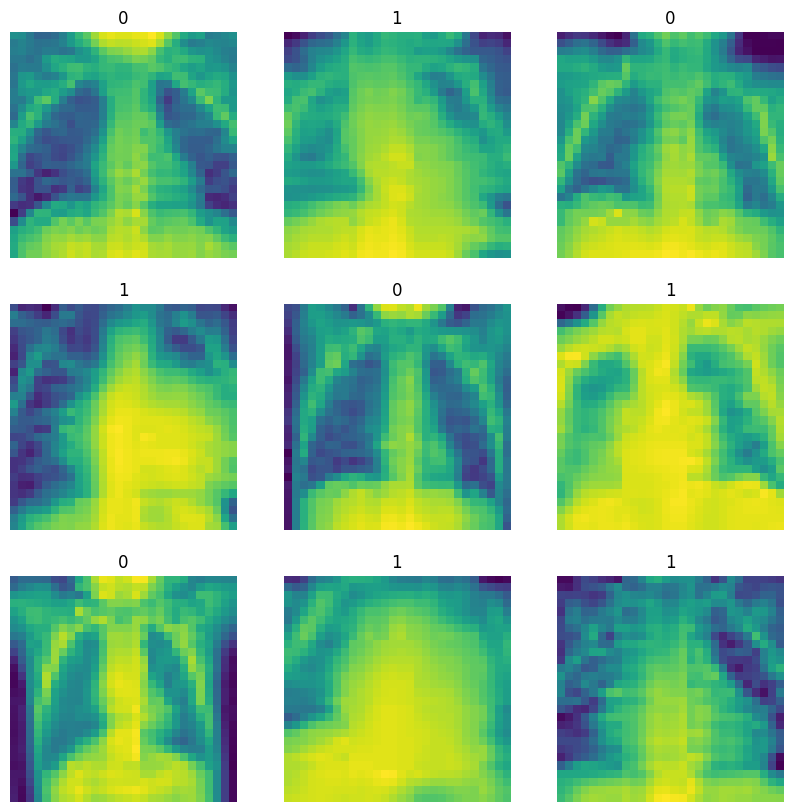

In [40]:
plt.figure(figsize = (10,10))
for i , (image , label) in enumerate(train.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image.numpy())
  plt.title(label.numpy())
  plt.axis('off')

In [45]:
model = tf.keras.Sequential([
    tf.keras.Input(shape = input_shape),
    tf.keras.layers.Conv2D(64 , kernel_size=(3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32 , kernel_size=(3,3) , activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64 , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,721 (284.07 KB)

 Trainable params: 72,721 (284.07 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
batch_size  = 32
epoch = 20

model.compile(optimizer='adam' , loss=tf.keras.losses.BinaryCrossentropy , metrics=['accuracy'])

In [47]:
X_train , y_train = dataset_split(train)
X_val , y_val = dataset_split(val)

Shape of X : (4708, 28, 28, 1)
Shape of y : (4708,)
Shape of X : (524, 28, 28, 1)
Shape of y : (524,)


In [48]:
model.fit(X_train , y_train , batch_size=batch_size , epochs=epoch , validation_data=(X_val , y_val))

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6385 - loss: 1.3889 - val_accuracy: 0.7691 - val_loss: 0.5347
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8208 - loss: 0.4188 - val_accuracy: 0.9084 - val_loss: 0.2170
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8958 - loss: 0.2579 - val_accuracy: 0.9256 - val_loss: 0.1876
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9209 - loss: 0.2120 - val_accuracy: 0.9351 - val_loss: 0.1775
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9243 - loss: 0.2015 - val_accuracy: 0.9427 - val_loss: 0.1433
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9366 - loss: 0.1649 - val_accuracy: 0.9599 - val_loss: 0.1433
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9378 - loss: 0.1749 - val_accuracy: 0.9599 - val_loss: 0.1112
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9456 - loss: 0.1416 - val_accu

In [50]:
X_test , y_test = dataset_split(test)
model.evaluate(X_test , y_test)

Shape of X : (624, 28, 28, 1)
Shape of y : (624,)
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8444 - loss: 0.6545


[0.7214667201042175, 0.8317307829856873]